In [2]:
# showing plots for data from 2/11/25
# the sweeping data was collected with 1 source meter, collecting I_DS and I_GS
# this data was DMF-based functionalization on b2d3b (batch 2 device 3 well b)
# the time series data was done with 0.01X PBS and antigen
# the time series data was done only using 1 channel

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

In [4]:
filenames_func = ['data/data_2-11-25/b2d3b-id-1x.csv', 
                 'data/data_2-11-25/b2d3b-pbase-1x.csv', 
                 'data/data_2-11-25/b2d3b-antibody-1x.csv',
                 'data/data_2-11-25/b2d3b-peg-1x.csv',
                 'data/data_2-11-25/b2d3b-eta-1x.csv',]

filename_timesweep = ['data/data_2-11-25/b2d3b-timeSeries-01x.csv']

def load_csv_data(filenames):
    '''
    for multiple file
    6, 4
    '''
    data_list = []
    for filename in filenames:
        data_device = np.loadtxt(filename, delimiter=',', skiprows=1).T[[6, 4],:]
        # print(data_device.shape)
        # header = np.loadtxt(data_folder + filename, delimiter=",", dtype=str, max_rows=1)
        data_list.append(data_device)
    data = np.array(data_list)
    data[:, 1, :] *= 1000.0
    return data[:,:,-200:][:, :, ::-1]



data_func = load_csv_data(filenames_func)
# print(data_func.shape)
# print(data_func)

In [5]:
dirac_points_idx = np.argmin(data_func[:,1,:], axis=-1)
# print(dirac_points)
dirac_points = np.array([data_func[idx,:,dirac_points_idx[idx]] for idx in range(len(dirac_points_idx))])
# for idx in dirac_points:
#     print()
print(dirac_points.shape)
print(dirac_points)


(5, 2)
[[0.27     0.391707]
 [0.34     0.305663]
 [0.325    0.309852]
 [0.305    0.32102 ]
 [0.264993 0.24613 ]]


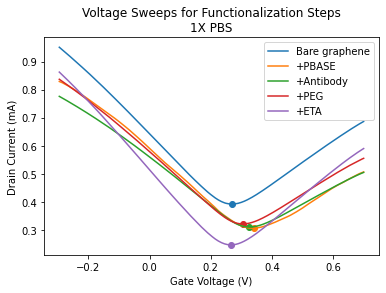

In [6]:
labels = ['Bare graphene', '+PBASE', '+Antibody', '+PEG', '+ETA']
for idx in range(data_func.shape[0]):
    plt.plot(data_func[idx][0], data_func[idx][1], label=labels[idx])
    plt.scatter(dirac_points[idx,0], dirac_points[idx,1])
plt.xlabel('Gate Voltage (V)')
plt.ylabel('Drain Current (mA)')
plt.title('Voltage Sweeps for Functionalization Steps\n1X PBS')
plt.legend()
plt.show()
plt.close()

[np.float64(0.0), np.float64(-0.07), np.float64(-0.05499999999999999), np.float64(-0.034999999999999976), np.float64(0.005007000000000039)]


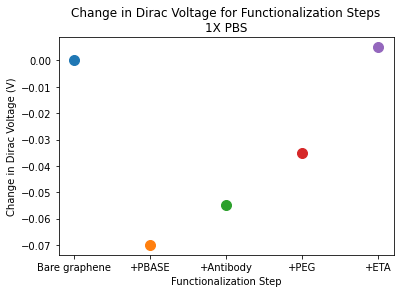

In [7]:
labels = ['Bare graphene', '+PBASE', '+Antibody', '+PEG', '+ETA']

for idx in range(data_func.shape[0]):
    # plt.plot(data_func[idx][0], data_func[idx][1], label=labels[idx])
    plt.scatter(idx, dirac_points[0][0] - dirac_points[idx,0], s=100)

print([dirac_points[0][0] - dirac_points[idx,0] for idx in range(data_func.shape[0])])
plt.xlabel('Functionalization Step')
plt.ylabel('Change in Dirac Voltage (V)')
plt.title('Change in Dirac Voltage for Functionalization Steps\n1X PBS')
plt.xticks(range(len(labels)), labels)
plt.show()
plt.close()

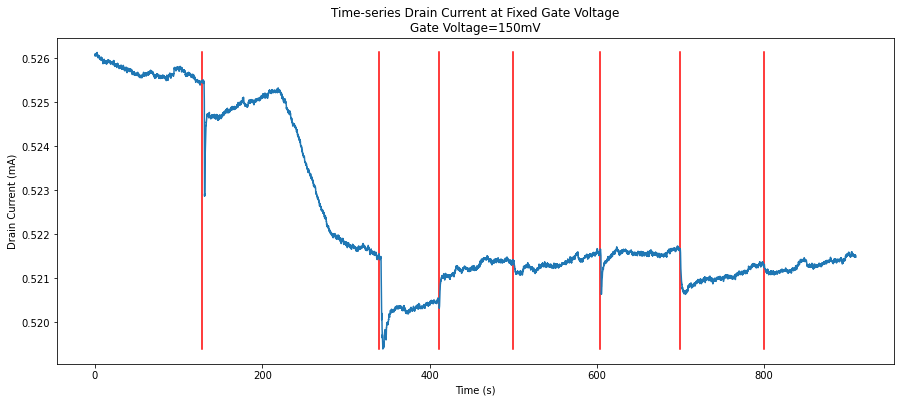

In [8]:
# filename_timesweep = 'data/data_2-11-25/b2d3b-timeSeries-01x.csv'
# data_func = load_csv_data(filename_timesweep)
data_timesweep = np.genfromtxt('data/data_2-11-25/b2d3b-timeSeries-01x.csv', delimiter=",", dtype=np.float64, filling_values=np.nan)
# print(data_timesweep.shape)
data_timesweep = data_timesweep[1:9096,[4,3]].T
# print(data_timesweep.shape)

data_timesweep[1,:] *= 1000.0

plt.figure(figsize=(15, 6))

# timestamps in seconds:
# 130 - 1fg
# 340 - mechanical disturbance
# 415 - 0.01X blanck
# 500 - 1pg
# 605 - 1ng
# 700 - 1ug
# 800 - blanck
minim = np.min(data_timesweep[1])
maxim = np.max(data_timesweep[1])

plt.plot([128, 128], [minim, maxim], color='r', label='1fg')
plt.plot([340, 340], [minim, maxim], color='r', label='Mechanical Disturbance')
plt.plot([411, 411], [minim, maxim], color='r', label='0.01X PBS blanck')
plt.plot([500, 500], [minim, maxim], color='r', label='1pg')
plt.plot([604, 604], [minim, maxim], color='r', label='1ng')
plt.plot([699, 699], [minim, maxim], color='r', label='1ug')
plt.plot([800, 800], [minim, maxim], color='r', label='0.01X PBS blanck')

plt.plot(data_timesweep[0], data_timesweep[1])
plt.xlabel('Time (s)')
plt.ylabel('Drain Current (mA)')
plt.title('Time-series Drain Current at Fixed Gate Voltage\nGate Voltage=150mV')
# plt.legend()
plt.show()
plt.close()

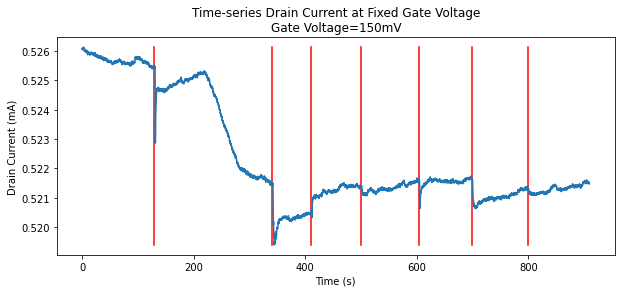

In [9]:
def plot_time_series_1ch(file_path, max_time_sample, xval_action_list, title):
    data_timesweep = np.genfromtxt(file_path, delimiter=",", dtype=np.float64, filling_values=np.nan)
    data_timesweep = data_timesweep[1:max_time_sample,[4,3]].T
    
    data_timesweep[1,:] *= 1000.0
    
    plt.figure(figsize=(10, 4))
    
    minim = np.min(data_timesweep[1])
    maxim = np.max(data_timesweep[1])
    for xval in xval_action_list:
        plt.plot([xval, xval], [minim, maxim], color='r')
    
    plt.plot(data_timesweep[0], data_timesweep[1])
    plt.xlabel('Time (s)')
    plt.ylabel('Drain Current (mA)')
    plt.title(title)
    plt.show()
    plt.close()


file_path = 'data/data_2-11-25/b2d3b-timeSeries-01x.csv'
max_time_sample = 9096
xval_action_list = [128, 340, 411, 500, 604, 699, 800]
title = 'Time-series Drain Current at Fixed Gate Voltage\nGate Voltage=150mV'
plot_time_series_1ch(file_path=file_path, 
                     max_time_sample=max_time_sample, 
                     xval_action_list=xval_action_list, 
                     title=title)
